### Ayush Adhikari, Kuan-Chun Chiu (Derek Chiu)
### Prof. Fuentes-Cabrera
### DS 4400 Machine Learning and Data Mining 1
### 2025/03/27

#### Purpose of the file:
The purpose of this file is to do house price prediction using machine learning, including model training, model validating, and model testing. To achieve these tasks, the dataset will be normalized and splitted into a training set, validating set, and testing set. The model used are multiple linear regression and random forest regression. The final results will be visualized into plots, and metrics like R² score and MSE will be employed to assess the model performance.

In [29]:
# Import all needed libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [30]:
# Load the cleaned dataset

house_price_df = pd.read_csv("Cleaned_house_price.csv")
print (f"Shape of the data frame: {house_price_df.shape}")
house_price_df.head()

Shape of the data frame: (1460, 15)


,Id,MSSubClass,LotArea,OverallCond,YearBuilt,TotalBsmtSF,SalePrice,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,1,60,8450,5,2003,856.0,208500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20,9600,8,1976,1262.0,181500.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,60,11250,5,2001,920.0,223500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,70,9550,5,1915,756.0,140000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,60,14260,5,2000,1145.0,250000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Remove irrelevent features and separate target variable

house_price_df.drop("Id", axis=1, inplace=True)
y = house_price_df["SalePrice"]
house_price_df.drop("SalePrice", axis=1, inplace=True)
print (f"Target variable (the first 10 prices): {list(y)[:10]}")
house_price_df.head()

Target variable (the first 10 prices): [208500.0, 181500.0, 223500.0, 140000.0, 250000.0, 143000.0, 307000.0, 200000.0, 129900.0, 118000.0]


,MSSubClass,LotArea,OverallCond,YearBuilt,TotalBsmtSF,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,60,8450,5,2003,856.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,20,9600,8,1976,1262.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,920.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70,9550,5,1915,756.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,14260,5,2000,1145.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Normalize the features and conevrt it into a matrix

scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(house_price_df)
intercepts = np.ones(len(normalized_df)).reshape(-1, 1)
X = np.concatenate((normalized_df, intercepts), axis=1)
X[:10]

array([[0.23529412, 0.0334198 , 0.5       , 0.94927536, 0.1400982 ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.03879502, 0.875     , 0.75362319, 0.20654664,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.23529412, 0.04650728, 0.5       , 0.93478261, 0.15057283,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.29411765, 0.03856131, 0.5       , 0.3115942 , 0.12373159,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.23529412, 0.06057632, 0.5       , 0.92753623, 0.18739771,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.17647059, 0.05989857, 0.5

In [33]:
# Split the dataset into a training set, validating set, and testing set

X_train, X_rest, y_train, y_rest = train_test_split(X, y, train_size=0.8)
X_validate, X_test, y_validate, y_test = train_test_split(X_rest, y_rest, train_size=0.5)
print (f"Length of each set: \nTrain: {len(X_train)}\nValidate: {len(X_validate)}\nTest: {len(X_test)}")

Length of each set: 
Train: 1168
Validate: 146
Test: 146


In [34]:
# Find the best lambda value for ridge and lasso regression

all_lambda_values = np.logspace(-5, 0, 100)
ridge_cv = RidgeCV(alphas=all_lambda_values, store_cv_results=True)
ridge_cv.fit(X_train, y_train)
ridge_lam = ridge_cv.alpha_
print (f"Best lambda for ridge regression: {ridge_lam}")

lasso_cv = LassoCV(alphas=all_lambda_values, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)
lasso_lam = lasso_cv.alpha_
print (f"Best lambda for lasso regression: {lasso_lam}")

Best lambda for ridge regression: 0.5590810182512223
Best lambda for lasso regression: 1.0


In [35]:
# Use close form solution to derive the best weight vectors for the best fit line equation, using ridge regression

def ridge_close_form(X, y, lam):
    penalty = lam*np.eye(X.shape[1])
    xtx_inv = np.linalg.inv(np.matmul(X.T, X) + penalty)
    xty = np.matmul(X.T, y)
    w = np.matmul(xtx_inv, xty)
    return w

ridge_w = ridge_close_form(X_train, y_train, ridge_lam)
print (f"Best weight vector using ridge regression: \n{list(ridge_w)}\n")
best_fit_line = f"{ridge_w[0]}x1 + {ridge_w[1]}x2 + {ridge_w[2]}x3 + {ridge_w[3]}x4 + {ridge_w[4]}x5 + {ridge_w[5]}x6 + {ridge_w[6]}x7 + \
{ridge_w[7]}x8 + {ridge_w[8]}x9 + {ridge_w[9]}x10 + {ridge_w[10]}x11 + {ridge_w[11]}x12 + {ridge_w[12]}x13 + {ridge_w[13]}"
best_fit_line = best_fit_line.replace("+ -", "- ")
print (f"Best fit line equation using ridge regression: \nf(x) = {best_fit_line}")

Best weight vector using ridge regression: 
[132410.024160536, 144863.9215356285, 66200.89386453014, 153743.34913404193, 474815.44883065857, 552.057522425428, -14015.846713371633, 2512.228671249468, -5347.1174197338405, -106121.63453415944, -71168.01287019486, -124815.79123639507, -96405.2995341164, -64974.048056868836]

Best fit line equation using ridge regression: 
f(x) = 132410.024160536x1 + 144863.9215356285x2 + 66200.89386453014x3 + 153743.34913404193x4 + 474815.44883065857x5 + 552.057522425428x6 - 14015.846713371633x7 + 2512.228671249468x8 - 5347.1174197338405x9 - 106121.63453415944x10 - 71168.01287019486x11 - 124815.79123639507x12 - 96405.2995341164x13 - 64974.048056868836


In [36]:
# Use gradient descent to derive the best weight vectors for the best fit line equation, using lasso regression

def lasso_grad_descent(X, y, w, iterations, lr, lam):
    for _ in range(iterations):
        prediction = np.matmul(X, w)
        gradient = np.matmul(X.T, prediction - y)*(2/len(y)) + lam*np.sign(w)
        w -= lr*gradient
    return w

learn_rate = 0.01
iterations = 3000
initial_w = np.array([3, 2.5, 2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5, -2, -2.5, -3, 0], dtype=float)

lasso_w = lasso_grad_descent(X_train, y_train, initial_w, iterations, learn_rate, lasso_lam)
print (f"Best weight vector using lasso regression: \n{list(lasso_w)}\n")
best_fit_line = f"{lasso_w[0]}x1 + {lasso_w[1]}x2 + {lasso_w[2]}x3 + {lasso_w[3]}x4 + {lasso_w[4]}x5 + {lasso_w[5]}x6 + {lasso_w[6]}x7 + \
{lasso_w[7]}x8 + {lasso_w[8]}x9 + {lasso_w[9]}x10 + {lasso_w[10]}x11 + {lasso_w[11]}x12 + {lasso_w[12]}x13 + {lasso_w[13]}"
best_fit_line = best_fit_line.replace("+ -", "- ")
print (f"Best fit line equation using lasso regression: \nf(x) = {best_fit_line}")

Best weight vector using lasso regression: 
[8271.308961760054, 37460.04422378681, 24301.163863196874, 166096.61680571272, 130138.38387588681, 9840.754772214319, -17807.653777692947, -2.949624651255143, -11551.719956385678, -8047.3554562737245, -40254.933265849446, -48144.00065494662, -31784.15877160261, 35580.00385778783]

Best fit line equation using lasso regression: 
f(x) = 8271.308961760054x1 + 37460.04422378681x2 + 24301.163863196874x3 + 166096.61680571272x4 + 130138.38387588681x5 + 9840.754772214319x6 - 17807.653777692947x7 - 2.949624651255143x8 - 11551.719956385678x9 - 8047.3554562737245x10 - 40254.933265849446x11 - 48144.00065494662x12 - 31784.15877160261x13 + 35580.00385778783


In [37]:
# Use gradient descent to derive the best weight vectors for the best fit line equation, using elastic net regression

def elastic_grad_descent(X, y, w, iterations, lr, l_lam, r_lam):
    for _ in range(iterations):
        prediction = np.matmul(X, w)
        gradient = np.matmul(X.T, prediction - y)*(2/len(y)) + l_lam*np.sign(w) + r_lam*2*w
        w -= lr*gradient
    return w

learn_rate = 0.01
iterations=3000
initial_w = np.array([3, 2.5, 2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5, -2, -2.5, -3, 0], dtype=float)

elastic_w = elastic_grad_descent(X_train, y_train, initial_w, iterations, learn_rate, lasso_lam, ridge_lam)
print (f"Best weight vector using elastic net regression: \n{list(elastic_w)}\n")
best_fit_line = f"{elastic_w[0]}x1 + {elastic_w[1]}x2 + {elastic_w[2]}x3 + {elastic_w[3]}x4 + {elastic_w[4]}x5 + {elastic_w[5]}x6 + {elastic_w[6]}x7 + \
{elastic_w[7]}x8 + {elastic_w[8]}x9 + {elastic_w[9]}x10 + {elastic_w[10]}x11 + {elastic_w[11]}x12 + {elastic_w[12]}x13 + {elastic_w[13]}"
best_fit_line = best_fit_line.replace("+ -", "- ")
print (f"Best fit line equation using elastic net regression: \nf(x) = {best_fit_line}")

Best weight vector using elastic net regression: 
[8992.277400495692, 4215.986399575391, 33393.379353524375, 55126.527045045936, 15973.741724221964, 8382.355079964742, 2805.152641926904, 166.42511443287947, 29283.012154776472, -359.16009240665505, -732.3355052111056, -1378.3562421912952, 2220.3299019214282, 60887.29139436553]

Best fit line equation using elastic net regression: 
f(x) = 8992.277400495692x1 + 4215.986399575391x2 + 33393.379353524375x3 + 55126.527045045936x4 + 15973.741724221964x5 + 8382.355079964742x6 + 2805.152641926904x7 + 166.42511443287947x8 + 29283.012154776472x9 - 359.16009240665505x10 - 732.3355052111056x11 - 1378.3562421912952x12 + 2220.3299019214282x13 + 60887.29139436553


In [38]:
# Validate the performance of 4 models - lasso, ridge, elastic net, random forest regression

def mse(prediction, y):
    mse = np.sum((y - prediction) ** 2)/len(y)
    return mse

lasso_w = lasso_w.reshape(-1, 1)
ridge_w = ridge_w.reshape(-1, 1)
elastic_w = elastic_w.reshape(-1, 1)
y_validate = np.array(y_validate).reshape(-1, 1)

lasso_result = np.matmul(X_validate, lasso_w)
ridge_result = np.matmul(X_validate, ridge_w)
elastic_result = np.matmul(X_validate, elastic_w)
random_forest = RandomForestRegressor(n_estimators=150, random_state=42)
random_forest.fit(X_train, y_train)
forest_result = random_forest.predict(X_validate)

lasso_mse = mse(lasso_result, y_validate)
ridge_mse = mse(ridge_result, y_validate)
elastic_mse = mse(elastic_result, y_validate)
forest_mse = mse(forest_result, y_validate)

print (f"Lasso regression model MSE: {lasso_mse}\nRidge regression model MSE: {ridge_mse}\nElastic net regression model MSE: {elastic_mse}\n\
Random forest regression model MSE: {forest_mse}\n")
print (f"The best performing model is the ridge regression model, because its prediction's mean square error is only {ridge_mse}, the lowest among \
all models. It means ridge model gives the most accurate prediction that's closer to the true result compared to the rest of the 3 models. Thus, \
ridge regression model will be used for the final prediction of the house price.")

Lasso regression model MSE: 4186867082.248556
Ridge regression model MSE: 2889764001.325363
Elastic net regression model MSE: 8341804940.40833
Random forest regression model MSE: 1844410777843.3374

The best performing model is the ridge regression model, because its prediction's mean square error is only 2889764001.325363, the lowest among all models. It means ridge model gives the most accurate prediction that's closer to the true result compared to the rest of the 3 models. Thus, ridge regression model will be used for the final prediction of the house price.


In [39]:
# House price prediction using ridge regression

prediction = np.matmul(X_test, ridge_w)
prediction = list(prediction.reshape(len(y_test),))
prediction[:10]

[101998.22834228002,
 173434.38941055664,
 243930.417442764,
 245692.2763966891,
 180440.49172616212,
 212254.91510926912,
 129091.80687962833,
 215876.07106272285,
 184973.21516829432,
 200392.141446856]

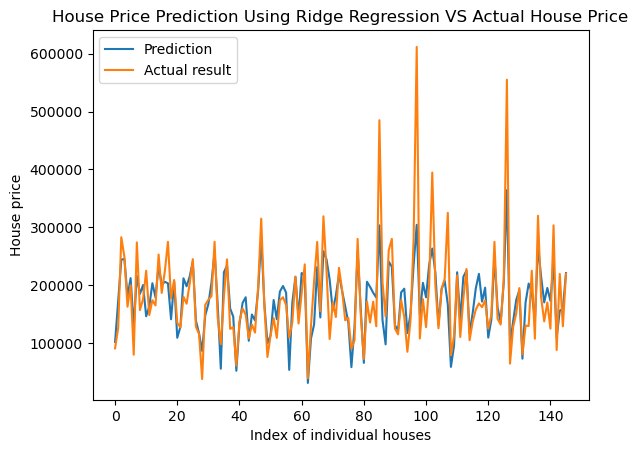

In [40]:
# Prediction result vvisualization 1

x_index = range(len(prediction))
plt.plot(x_index, prediction, label="Prediction")
plt.plot(x_index, y_test, label="Actual result")
plt.title("House Price Prediction Using Ridge Regression VS Actual House Price")
plt.xlabel("Index of individual houses")
plt.ylabel("House price")
plt.legend()
plt.show()

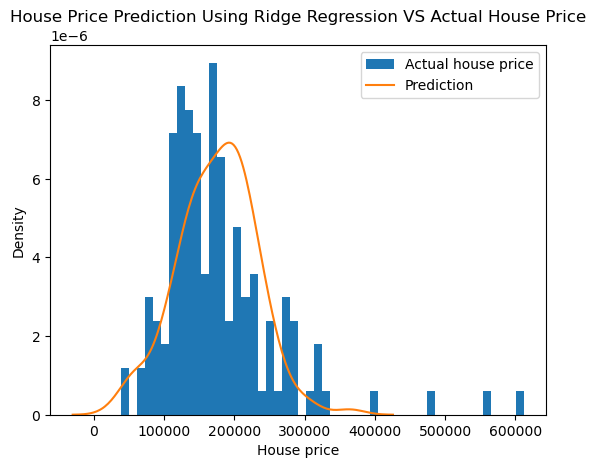

In [43]:
# Prediction result vvisualization 2

plt.hist(y_test, bins=50, density=True, label="Actual house price")
sns.kdeplot(prediction, label="Prediction")
plt.title("House Price Prediction Using Ridge Regression VS Actual House Price")
plt.xlabel("House price")
plt.ylabel("Density")
plt.legend()
plt.show()

In [42]:
# Assessing model prediction performance

prediction_mse = mse(prediction, y_test)
prediction_r2 = r2_score(y_test, prediction)
print (f"Mean square error of the house price prediction: {prediction_mse}")
print (f"R2 score of the house price prediction: {prediction_r2}")

Mean square error of the house price prediction: 2409080961.4474597
R2 score of the house price prediction: 0.6515312215672766
